<a href="https://colab.research.google.com/github/harsh-kmr/ml_projects/blob/master/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning

## TensorFlow

### Basic

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as mtp

tf.version

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>

TensorFlow is called 'TensorFlow' because it handles the flow (node/mathematical operation) of Tensors(Tensors are multi-dimensional arrays with a uniform type) . Tensors are represented as n-dimensional arrays of base dataypes such as a string or integer 

The shape of a Tensor defines its number of dimensions and the size of each 
dimension. The rank of a Tensor provides the number of dimensions (n-dimensions)

---

In [ ]:
sport = tf.constant("Tennis", tf.string)
number = tf.constant(1.41421356237, tf.float64)

print("`sport` is a {}-d Tensor".format(tf.rank(sport).numpy()))
print("`number` is a {}-d Tensor".format(tf.rank(number).numpy()))

`sport` is a 0-d Tensor
`number` is a 0-d Tensor


Tensors have shapes. Some vocabulary:

1. Shape: The length (number of elements) of each of the axes of a tensor.

2. Rank: Number of tensor axes. A scalar has rank 0, a vector has rank 1, a matrix is rank 2.

3. Axis or Dimension: A particular dimension of a tensor.

4. Size: The total number of items in the tensor, the product of the shape vector's elements.



In [ ]:
sports = tf.constant(["Tennis", "Basketball"], tf.string)
numbers = tf.constant([3.141592, 1.414213, 2.71821], tf.float64)

print("`sports` is a {}-d Tensor with shape: {}".format(tf.rank(sports).numpy(), tf.shape(sports)))
print("`numbers` is a {}-d Tensor with shape: {}".format(tf.rank(numbers).numpy(), tf.shape(numbers)))

`sports` is a 1-d Tensor with shape: [2]
`numbers` is a 1-d Tensor with shape: [3]


In [ ]:
matrix = tf.constant([1,2,3,4,5,6], dtype=tf.int32, shape=(2,3))

matrix

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [ ]:
reshaped = tf.reshape(matrix,[2*3])
reshaped2 = tf.reshape(matrix,[-1])
reshaped2

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6], dtype=int32)>

Reshaping will "work" for any new shape with the same total number of elements, but it will not do anything useful if you do not respect the order of the axes.

In [ ]:
x = tf.constant([1, 2, 3])

y = tf.constant(2)
z = tf.constant([2, 2, 2])
# All of these are the same computation
print(tf.multiply(x, 2))
print(x * y)
print(x * z)

tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)


Broadcasting is a concept borrowed from the equivalent feature in NumPy. In short, under certain conditions, smaller tensors are "stretched" automatically to fit larger tensors when running combined operations on them.

In [ ]:
tf.constant("🥳👍")

<tf.Tensor: shape=(), dtype=string, numpy=b'\xf0\x9f\xa5\xb3\xf0\x9f\x91\x8d'>

A tensor with variable numbers of elements along some axis is called "ragged". Use tf.ragged.RaggedTensor for ragged data.

In [ ]:
a = tf.constant([[15,16],[17,18]])
b = tf.constant([10,10])

# Add them!
c1 = tf.add(a,b)
c2 = a + b # TensorFlow overrides the "+" operation so that it is able to act on Tensors
print(c1)
print(c2)

tf.Tensor(
[[25 26]
 [27 28]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[25 26]
 [27 28]], shape=(2, 2), dtype=int32)


In [ ]:
def func(a,b):
  '''TODO: Define the operation for c, d, e (use tf.add, tf.subtract, tf.multiply).'''
  c = tf.add(a,b)
  d = tf.subtract(b,1)
  e = tf.multiply(c,d)
  return e

In [ ]:
func(a,b)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[225, 234],
       [243, 252]], dtype=int32)>

In [ ]:
a, b = 1.5, 2.5
# Execute the computation
e_out = func(a,b)
print(e_out)

tf.Tensor(6.0, shape=(), dtype=float32)


### Neural networks in TensorFlow

TensorFlow uses a high-level API called Keras that provides a powerful, intuitive framework for building and training deep learning models.

Tensors can flow through abstract types called Layers -- the building blocks of neural networks. Layers implement common neural networks operations, and are used to update weights, compute losses, and define inter-layer connectivity.

In [ ]:
!pip install mitdeeplearning
import mitdeeplearning as mdl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 11.5 MB/s 
  Created wheel for mitdeeplearning: filename=mitdeeplearning-0.2.0-py3-none-any.whl size=2115441 sha256=b1762027c17ac8f4ba9108626ba7d30a08ef30d44bda4830846fe350dd2fb8e4
  Stored in directory: /root/.cache/pip/wheels/9a/b9/4f/99b7c8c5c75355550b83e1fcfc02956fb40c35eb01e2262877
Successfully built mitdeeplearning


In [ ]:
class OurDenseLayer(tf.keras.layers.Layer):
  def __init__(self, n_output_nodes):
    super(OurDenseLayer, self).__init__()
    self.n_output_nodes = n_output_nodes

  def build(self, input_shape):
    d = int(input_shape[-1])
    # Define and initialize parameters: a weight matrix W and bias b
    # Note that parameter initialization is random!
    self.W = self.add_weight("weight", shape=[d, self.n_output_nodes]) # note the dimensionality
    self.b = self.add_weight("bias", shape=[1, self.n_output_nodes]) # note the dimensionality

  def call(self, x):
    '''TODO: define the operation for z (hint: use tf.matmul)'''
    z = tf.add(tf.matmul(x,self.W),self.b)

    '''TODO: define the operation for out (hint: use tf.sigmoid)'''
    y = tf.sigmoid(z)
    return y


In [ ]:

# Since layer parameters are initialized randomly, we will set a random seed for reproducibility
tf.random.set_seed(1)
layer = OurDenseLayer(3)
layer.build((1,2))
x_input = tf.constant([[1,2.]], shape=(1,2))
y = layer.call(x_input)

# test the output!
print(y.numpy())
mdl.lab1.test_custom_dense_layer_output(y)

[[0.26978594 0.45750415 0.6653695 ]]
[PASS] test_custom_dense_layer_output


True

Conveniently, TensorFlow has defined a number of Layers that are commonly used in neural networks, for example a Dense. Now, instead of using a single Layer to define our simple neural network, we'll use the Sequential model from Keras and a single Dense layer to define our network. With the Sequential API, you can readily create neural networks by stacking together layers like building blocks.


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the number of outputs
n_output_nodes = 3

# First define the model 
model = Sequential()

'''TODO: Define a dense (fully connected) layer to compute z'''
# Remember: dense layers are defined by the parameters W and b!
# You can read more about the initialization of W and b in the TF documentation :) 
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable
dense_layer = Dense(n_output_nodes, activation='sigmoid')

# Add the dense layer to the model
model.add(dense_layer)

In [ ]:
# Test model with example input
x_input = tf.constant([[1,2.]], shape=(1,2))

'''TODO: feed input into the model and predict the output!'''

model_output = model(x_input)
print(model_output)

tf.Tensor([[0.5607363  0.65668976 0.1249697 ]], shape=(1, 3), dtype=float32)


### digit classification

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
X_train[0].shape

(28, 28)

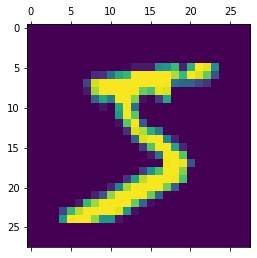

In [ ]:
plt.matshow(X_train[0])

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), -1)/255
X_test_flattened = X_test.reshape(len(X_test), -1)/255

scaling improves the accuracy.

In [ ]:
X_train_flattened.shape

(60000, 784)

input: 784

output: 10 

784 input to 10 output

simple NN without any hidden layer

<img src="https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/0981fe55db7a7abf19ff1d852d9a59153289641e/1_digits_recognition/digits_nn.jpg"/>

In [ ]:
model = keras.Sequential(keras.layers.Dense(10,input_shape=(784,), activation="sigmoid", ))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_flattened, y_train, epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4706 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3044 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2841 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2734 - accuracy: 0.9245
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2672 - accuracy: 0.9255


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2680 - accuracy: 0.9236


[0.2680058479309082, 0.9236000180244446]

y_predicted will be an array of _________ , where the highest value represent the class/ category the data point will belong to.

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([1.73662659e-02, 3.05542443e-07, 4.82722707e-02, 9.45348263e-01,
       2.65075685e-03, 1.03771105e-01, 1.14853083e-06, 9.99813139e-01,
       6.15767203e-02, 5.99195182e-01], dtype=float32)

In [ ]:
y_test[0]

7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

Text(33.0, 0.5, 'Truth')

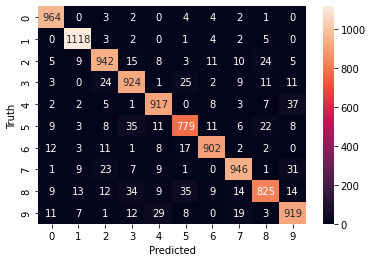

In [ ]:
cm = tf.math.confusion_matrix(y_test, y_predicted_labels)

import seaborn as sn

%matplotlib inline
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

using hidden layer

786--->100--->10

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(100, input_shape=(784,)))
model2.add(keras.layers.Dense(10, activation='sigmoid'))

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model2.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3631 - accuracy: 0.8962
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2957 - accuracy: 0.9173
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2864 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2788 - accuracy: 0.9220
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2743 - accuracy: 0.9233


In [ ]:
model3 = keras.Sequential()
model3.add(keras.layers.Dense(100, input_shape=(784,), activation='relu'))
model3.add(keras.layers.Dense(10, activation='sigmoid'))

model3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model3.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2702 - accuracy: 0.9231
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1202 - accuracy: 0.9647
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0847 - accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0641 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0501 - accuracy: 0.9847


In [ ]:
model2.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2839 - accuracy: 0.9207


[0.2839291989803314, 0.9207000136375427]

In [ ]:
model3.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0852 - accuracy: 0.9726


[0.08516579866409302, 0.972599983215332]

313/313 [==============================] - 0s 1ms/step


Text(69.0, 0.5, 'Truth')

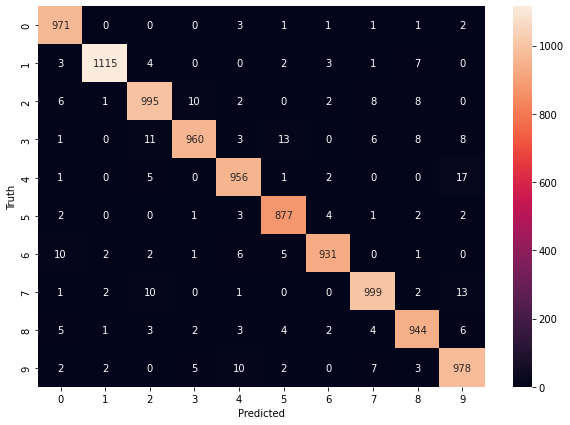

In [ ]:
y_predicted = model3.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Using Flatten layer so that we don't have to call .reshape on input dataset

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train/255, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2751 - accuracy: 0.9221
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1239 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0856 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0645 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0514 - accuracy: 0.9842


In [ ]:
model.evaluate(X_test/255,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0853 - accuracy: 0.9735


[0.08534921705722809, 0.9735000133514404]

In [ ]:
y_pred= model.predict(X_test/255)

313/313 [==============================] - 0s 1ms/step


Text(69.0, 0.5, 'Truth')

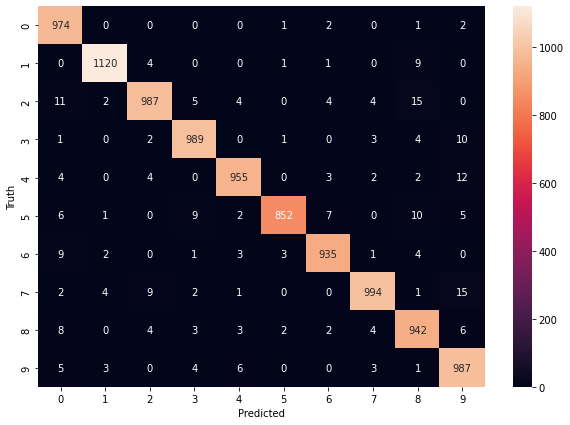

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### activation function

In artificial neural networks, the activation function of a node defines the output of that node given an input or set of inputs.

purpose of activation function is to introduce non linearity in network

some common activation function are 🔻


*   Sigmoid
*   ReLU
*   Tanh


sigmoid :- is same as logistic regression.

Y(x) = Sigmoid(x) = 1/(1+e^-x)

ReLU(x):

{ 0 x<0

x  x>=0

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/f5ae4481873b5c6117772f69d22b262a24f38e7c" background="white" />

### dropout regularization

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [2]:
url ="https://raw.githubusercontent.com/harsh-kmr/ml_projects/master/sonar.csv"

In [3]:
df =pd.read_csv(url, header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [5]:
df[60].unique()

array(['R', 'M'], dtype=object)

In [6]:
df= pd.get_dummies(df, columns=[60,],drop_first=True)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60_R
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60_R
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.466346
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,0.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [8]:
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn.metrics import confusion_matrix , classification_report

In [9]:
x = df.drop(columns=['60_R',])
y = df['60_R']

x.shape, y.shape

((208, 60), (208,))

without dropout

In [10]:
def ANN(X,y):
  x_train, x_test, y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=1, stratify= y)

  model = keras.Sequential([
      keras.layers.Dense(60, input_dim=60, activation='relu'),
      keras.layers.Dense(30, activation='relu'),
      keras.layers.Dense(15, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  model.fit(x_train, y_train, epochs=100, batch_size=8)

  print(model.evaluate(x_test, y_test))

  y_preds = model.predict(x_test)
  y_preds = np.round(y_preds)

  print("Classification Report: \n", classification_report(y_test, y_preds))

  cm = tf.math.confusion_matrix(labels=y_test,predictions=y_preds)
  plt.figure(figsize = (10,7))
  sn.heatmap(cm, annot=True, fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('Truth')

WITH DROPOUT

In [11]:
def ANN_dropout(X,y, dropout):
  x_train, x_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify= y)

  model = keras.Sequential([
      keras.layers.Dense(60, input_dim=60, activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(30, activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(15, activation='relu'),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  model.fit(x_train, y_train, epochs=100, batch_size=8)

  print(model.evaluate(x_test, y_test))

  y_preds = model.predict(x_test)
  y_preds = np.round(y_preds)

  print("Classification Report: \n", classification_report(y_test, y_preds))

  cm = confusion_matrix(y_test,y_preds)
  plt.figure(figsize = (10,7))
  sn.heatmap(cm, annot=True, fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('Truth')


Epoch 1/100
20/20 [==============================] - 1s 3ms/step - loss: 0.6794 - accuracy: 0.5385
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6660 - accuracy: 0.7051
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6484 - accuracy: 0.5705
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6328 - accuracy: 0.7500
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5893 - accuracy: 0.7051
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5470 - accuracy: 0.7372
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5161 - accuracy: 0.7692
Epoch 8/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4773 - accuracy: 0.8077
Epoch 9/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4630 - accuracy: 0.8013
Epoch 10/100
20/20 [==============================] - 0s 3ms/step - loss: 0.4065 - accuracy: 0.8205
Epoch 11/

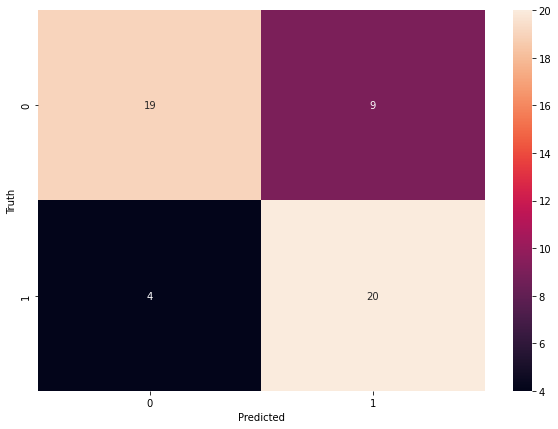

In [12]:
ANN(x,y)

Epoch 1/100
19/19 [==============================] - 1s 7ms/step - loss: 0.6936 - accuracy: 0.5586
Epoch 2/100
19/19 [==============================] - 0s 6ms/step - loss: 0.7104 - accuracy: 0.5034
Epoch 3/100
19/19 [==============================] - 0s 6ms/step - loss: 0.6831 - accuracy: 0.5379
Epoch 4/100
19/19 [==============================] - 0s 8ms/step - loss: 0.7173 - accuracy: 0.5241
Epoch 5/100
19/19 [==============================] - 0s 6ms/step - loss: 0.7066 - accuracy: 0.5241
Epoch 6/100
19/19 [==============================] - 0s 7ms/step - loss: 0.6905 - accuracy: 0.5655
Epoch 7/100
19/19 [==============================] - 0s 6ms/step - loss: 0.6864 - accuracy: 0.5862
Epoch 8/100
19/19 [==============================] - 0s 7ms/step - loss: 0.6783 - accuracy: 0.5793
Epoch 9/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6821 - accuracy: 0.5862
Epoch 10/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6598 - accuracy: 0.5724
Epoch 11/

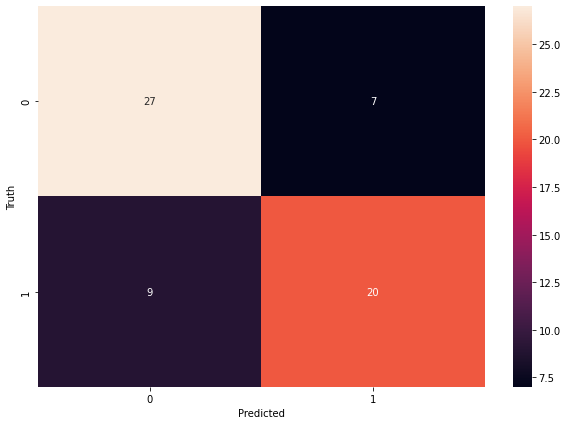

In [13]:
ANN_dropout(x,y, 0.5)

### churn prediction

#### telephone company

In [ ]:
url ="https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/11_chrun_prediction/customer_churn.csv"

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

data is skewed but we donot care about that for now

we can drop customerID as it doesnt provide any useful information

In [ ]:
df.drop(columns = ['customerID',], inplace= True )

In [ ]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df2 = pd.get_dummies(data = df,columns=['gender'], drop_first =True )


df2.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


In [ ]:
df2.dtypes

SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
gender_Male           uint8
dtype: object

In [ ]:
objeType = []

for col in df2.columns:
  if df2[col].dtypes == object:
    objeType.append(col)

objeType

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [ ]:
for col in objeType:
  print(col, ':', df2[col].unique())

Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


lets turn all no................. into no

In [ ]:
def fun(word):
  word = word.lower()
  if 'no' in word:
    return 0
  elif 'yes' in word:
    return 1
  else:
    return word

In [ ]:
for col in objeType:
  df2[col] = df2[col].apply(fun)

df2.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Male
0,0,1,0,1,0,0,dsl,0,1,0,0,0,0,month-to-month,1,electronic check,29.85,29.85,0,0
1,0,0,0,34,1,0,dsl,1,0,1,0,0,0,one year,0,mailed check,56.95,1889.5,0,1
2,0,0,0,2,1,0,dsl,1,1,0,0,0,0,month-to-month,1,mailed check,53.85,108.15,1,1
3,0,0,0,45,0,0,dsl,1,0,1,1,0,0,one year,0,bank transfer (automatic),42.30,1840.75,0,1
4,0,0,0,2,1,0,fiber optic,0,0,0,0,0,0,month-to-month,1,electronic check,70.70,151.65,1,0


update objeType

In [ ]:
objeType = []

for col in df2.columns:
  if df2[col].dtypes == object:
    objeType.append(col)

objeType

['InternetService', 'Contract', 'PaymentMethod', 'TotalCharges']

we can change total charge to number as it is present as string

In [ ]:
#pd.to_numeric(df2['TotalCharges'])

there are some empty string that cannot be changed into number.
we can remove them or replace it it zero/null and later replace it avg value or any other missing values handaling method.

In [ ]:
df2[df2['TotalCharges']== " "].shape, df2.shape

((11, 20), (7043, 20))

we can easily drop the empty total charges rows

In [ ]:
df3 = df2[df2['TotalCharges']!= " "]

In [ ]:
objeType = []

for col in df3.columns:
  if df3[col].dtypes == object:
    objeType.append(col)

objeType

['InternetService', 'Contract', 'PaymentMethod', 'TotalCharges']

In [ ]:
df3['TotalCharges'] = pd.to_numeric(df3['TotalCharges'])

<ipython-input-19-c7215ee5a425>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['TotalCharges'] = pd.to_numeric(df3['TotalCharges'])


In [ ]:
objeType = []

for col in df3.columns:
  if df3[col].dtypes == object:
    objeType.append(col)

objeType

['InternetService', 'Contract', 'PaymentMethod']

In [ ]:
for col in objeType:
  print(col, ':', df3[col].unique())

InternetService : ['dsl' 'fiber optic' 0]
Contract : ['month-to-month' 'one year' 'two year']
PaymentMethod : ['electronic check' 'mailed check' 'bank transfer (automatic)'
 'credit card (automatic)']


In [ ]:
df4 = pd.get_dummies(data= df3, columns=objeType)



In [ ]:
df4.dtypes

SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_Male                                  uint8
InternetService_0                            uint8
InternetService_dsl                          uint8
InternetService_fiber optic    

In [ ]:
x = df4.drop(columns=['Churn',])
y = df4['Churn']

In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


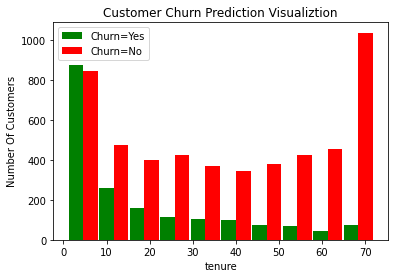

In [ ]:
tenure_churn_no = df4[df4.Churn==0].tenure
tenure_churn_yes = df4[df4.Churn==1].tenure
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

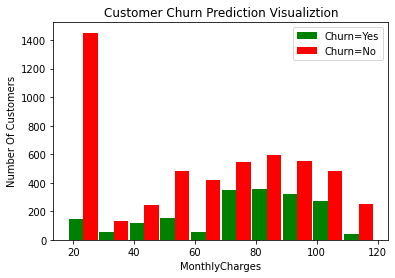

In [ ]:
MonthlyCharges_churn_no = df4[df4.Churn==0].MonthlyCharges
MonthlyCharges_churn_yes = df4[df4.Churn==1].MonthlyCharges
plt.xlabel("MonthlyCharges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([MonthlyCharges_churn_yes, MonthlyCharges_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

lets build a **ANN** model

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape= (26,)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation= 'sigmoid'),
]
)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train, y_test = train_test_split(x, y, test_size= 0.3, stratify=y)

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20)

Epoch 1/20
154/154 [==============================] - 1s 1ms/step - loss: 55.6119 - accuracy: 0.5146
Epoch 2/20
154/154 [==============================] - 0s 1ms/step - loss: 0.7355 - accuracy: 0.6711
Epoch 3/20
154/154 [==============================] - 0s 1ms/step - loss: 0.5359 - accuracy: 0.7668
Epoch 4/20
154/154 [==============================] - 0s 1ms/step - loss: 0.5234 - accuracy: 0.7633
Epoch 5/20
154/154 [==============================] - 0s 1ms/step - loss: 0.5479 - accuracy: 0.7633
Epoch 6/20
154/154 [==============================] - 0s 1ms/step - loss: 0.6586 - accuracy: 0.7611
Epoch 7/20
154/154 [==============================] - 0s 1ms/step - loss: 0.5652 - accuracy: 0.7672
Epoch 8/20
154/154 [==============================] - 0s 1ms/step - loss: 0.5115 - accuracy: 0.7735
Epoch 9/20
154/154 [==============================] - 0s 1ms/step - loss: 0.6577 - accuracy: 0.7590
Epoch 10/20
154/154 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.769

In [ ]:
model.evaluate(x_test, y_test)

66/66 [==============================] - 0s 3ms/step - loss: 0.4143 - accuracy: 0.8114


[0.4142691493034363, 0.8113744258880615]

In [ ]:
yp = model.predict(x_test)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

66/66 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1549
           1       0.66      0.59      0.63       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.81      0.81      0.81      2110



Text(69.0, 0.5, 'Truth')

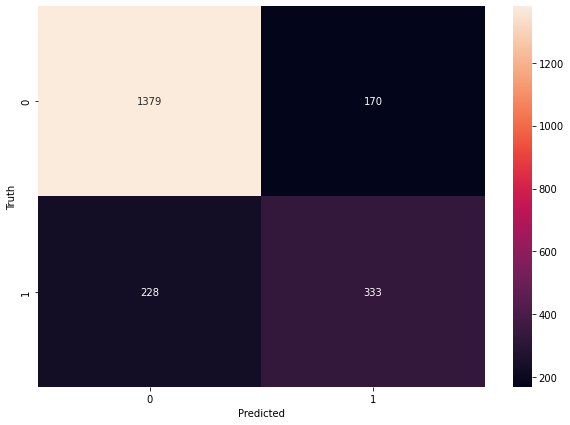

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### bank churn

In [ ]:
url = 'https://raw.githubusercontent.com/harsh-kmr/ml_projects/master/Churn_Modelling.csv'

In [ ]:
import pandas as pd 

In [ ]:
df = pd.read_csv(url)

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


we can drop the "RowNumber	CustomerId	Surname" columns

In [ ]:
df.drop(columns=['RowNumber',	'CustomerId',	'Surname',], inplace = True)

In [ ]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df = pd.get_dummies(data= df, columns=['Gender','Geography', ])

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


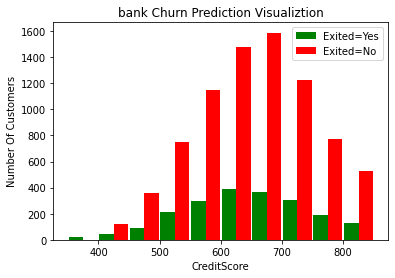

In [ ]:
import matplotlib.pyplot as plt


CreditScore_churn_no = df[df.Exited==0].CreditScore
CreditScore_churn_yes = df[df.Exited==1].CreditScore
plt.xlabel("CreditScore")
plt.ylabel("Number Of Customers")
plt.title("bank Churn Prediction Visualiztion")
plt.hist([CreditScore_churn_yes, CreditScore_churn_no], rwidth=0.95, color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.454300,0.545700,0.501400,0.250900,0.247700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.497932,0.497932,0.500023,0.433553,0.431698
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


lets scale the datas

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [ ]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

data is skewed but we donot care about that right now

25% of balances are zero, so lets do some visualisation

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


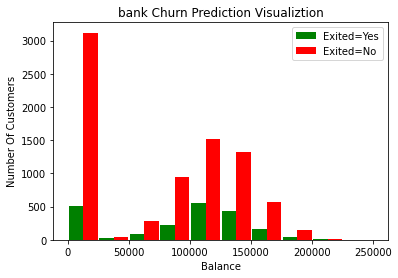

In [ ]:
Balance_churn_no = df[df.Exited==0].Balance	
Balance_churn_yes = df[df.Exited==1].Balance	
plt.xlabel("Balance")
plt.ylabel("Number Of Customers")
plt.title("bank Churn Prediction Visualiztion")
plt.hist([Balance_churn_yes, Balance_churn_no], rwidth=0.95, color=['green','red'],label=['Exited=Yes','Exited=No'])
plt.legend()

In [ ]:
x = df.drop(columns= ['Exited'])
y = df['Exited']

lets build a **ANN** model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sn

In [ ]:
def ANN(x,y):
  model = keras.Sequential([
      keras.layers.Input(shape= (13,)),
      keras.layers.Dense(10, activation='relu'),
      keras.layers.Dense(1, activation= 'sigmoid'),])
  x= scaler.fit_transform(x)
  x_train,x_test,y_train, y_test = train_test_split(x, y, test_size= 0.3, stratify=y, random_state=42)

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  
  model.fit(x_train, y_train, epochs=20)

  print(model.evaluate(x_test, y_test))

  y_preds = model.predict(x_test)
  y_preds = np.round(y_preds)

  print("Classification Report: \n", classification_report(y_test, y_preds))

  cm = tf.math.confusion_matrix(labels=y_test,predictions=y_preds)
  plt.figure(figsize = (10,7))
  sn.heatmap(cm, annot=True, fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('Truth')
  return y_preds

Epoch 1/20
219/219 [==============================] - 3s 3ms/step - loss: 0.5858 - accuracy: 0.7051
Epoch 2/20
219/219 [==============================] - 1s 3ms/step - loss: 0.4885 - accuracy: 0.7963
Epoch 3/20
219/219 [==============================] - 1s 3ms/step - loss: 0.4702 - accuracy: 0.7967
Epoch 4/20
219/219 [==============================] - 1s 3ms/step - loss: 0.4606 - accuracy: 0.7997
Epoch 5/20
219/219 [==============================] - 1s 3ms/step - loss: 0.4537 - accuracy: 0.8016
Epoch 6/20
219/219 [==============================] - 1s 3ms/step - loss: 0.4482 - accuracy: 0.8041
Epoch 7/20
219/219 [==============================] - 1s 3ms/step - loss: 0.4436 - accuracy: 0.8069
Epoch 8/20
219/219 [==============================] - 1s 3ms/step - loss: 0.4393 - accuracy: 0.8089
Epoch 9/20
219/219 [==============================] - 1s 3ms/step - loss: 0.4362 - accuracy: 0.8129
Epoch 10/20
219/219 [==============================] - 1s 3ms/step - loss: 0.4324 - accuracy: 0.8111

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

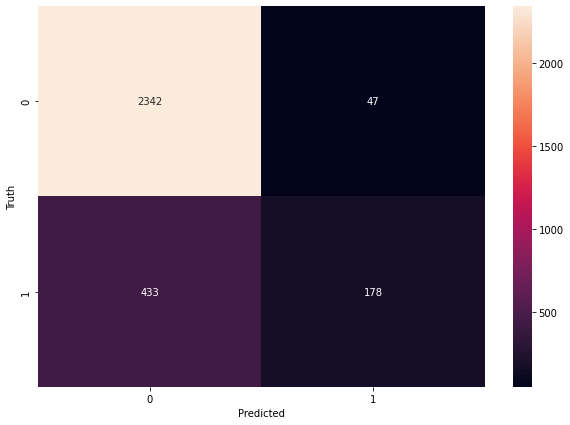

In [ ]:
ANN(x,y)

for 1 recall is quite low, so this is not a good model. so let try to handle the imbalanced dataset

1.   undersampling the higher class
2.   oversampling the lower class
3.   SMOTE
4.   Ensemble

In [ ]:
df_1 = df[df['Exited']== 1]
df_0 = df[df['Exited']== 0]

In [ ]:
df_1.shape, df_0.shape

((2037, 14), (7963, 14))

In [ ]:
df_0_under = df_0.sample(2037, random_state= 42)

In [ ]:
df_1_over = df_1.sample(7963, random_state= 42,replace=True)

In [ ]:
df_under = pd.concat([df_0_under, df_1], axis= 0)

In [ ]:
df_over =  pd.concat([df_0, df_1_over], axis= 0)

In [ ]:
x_over = df_over.drop(columns= ['Exited'])
y_over = df_over['Exited']

In [ ]:
x_under = df_under.drop(columns= ['Exited'])
y_under = df_under['Exited']


lets build a **ANN** model

Epoch 1/20
349/349 [==============================] - 1s 3ms/step - loss: 0.6750 - accuracy: 0.5811
Epoch 2/20
349/349 [==============================] - 1s 3ms/step - loss: 0.6264 - accuracy: 0.6427
Epoch 3/20
349/349 [==============================] - 1s 3ms/step - loss: 0.6051 - accuracy: 0.6754
Epoch 4/20
349/349 [==============================] - 1s 3ms/step - loss: 0.5895 - accuracy: 0.6880
Epoch 5/20
349/349 [==============================] - 1s 3ms/step - loss: 0.5750 - accuracy: 0.7046
Epoch 6/20
349/349 [==============================] - 1s 3ms/step - loss: 0.5634 - accuracy: 0.7115
Epoch 7/20
349/349 [==============================] - 1s 3ms/step - loss: 0.5545 - accuracy: 0.7199
Epoch 8/20
349/349 [==============================] - 1s 3ms/step - loss: 0.5462 - accuracy: 0.7254
Epoch 9/20
349/349 [==============================] - 1s 3ms/step - loss: 0.5394 - accuracy: 0.7282
Epoch 10/20
349/349 [==============================] - 1s 3ms/step - loss: 0.5335 - accuracy: 0.7326

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

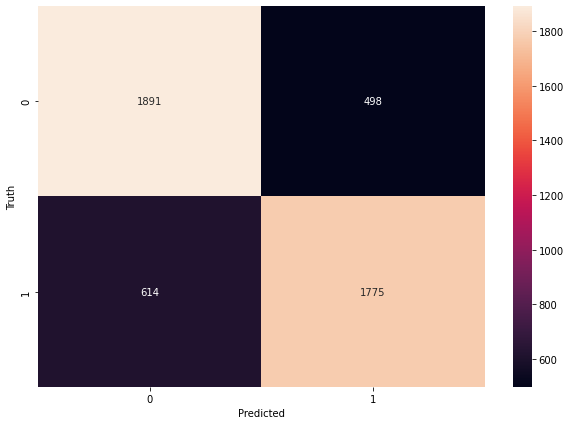

In [ ]:
ANN(x_over, y_over)

Epoch 1/20
90/90 [==============================] - 1s 3ms/step - loss: 0.7287 - accuracy: 0.4304
Epoch 2/20
90/90 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.4946
Epoch 3/20
90/90 [==============================] - 0s 3ms/step - loss: 0.6797 - accuracy: 0.5668
Epoch 4/20
90/90 [==============================] - 0s 3ms/step - loss: 0.6651 - accuracy: 0.6075
Epoch 5/20
90/90 [==============================] - 0s 3ms/step - loss: 0.6512 - accuracy: 0.6289
Epoch 6/20
90/90 [==============================] - 0s 3ms/step - loss: 0.6378 - accuracy: 0.6461
Epoch 7/20
90/90 [==============================] - 0s 3ms/step - loss: 0.6269 - accuracy: 0.6591
Epoch 8/20
90/90 [==============================] - 0s 3ms/step - loss: 0.6183 - accuracy: 0.6692
Epoch 9/20
90/90 [==============================] - 0s 3ms/step - loss: 0.6113 - accuracy: 0.6805
Epoch 10/20
90/90 [==============================] - 0s 4ms/step - loss: 0.6058 - accuracy: 0.6822
Epoch 11/20
90/90 [

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)

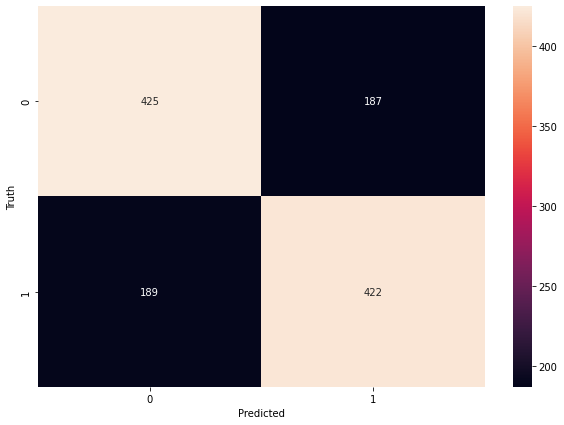

In [ ]:
ANN(x_under, y_under)


over and under sampling gives us some good recall and precision 

lets try SMOTE

In [ ]:
x = df.drop(columns= ['Exited'])
y = df['Exited']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

Epoch 1/20
349/349 [==============================] - 1s 3ms/step - loss: 0.5894 - accuracy: 0.7170
Epoch 2/20
349/349 [==============================] - 1s 3ms/step - loss: 0.4686 - accuracy: 0.8036
Epoch 3/20
349/349 [==============================] - 1s 3ms/step - loss: 0.4172 - accuracy: 0.8159
Epoch 4/20
349/349 [==============================] - 1s 3ms/step - loss: 0.3929 - accuracy: 0.8253
Epoch 5/20
349/349 [==============================] - 1s 3ms/step - loss: 0.3798 - accuracy: 0.8280
Epoch 6/20
349/349 [==============================] - 1s 3ms/step - loss: 0.3686 - accuracy: 0.8333
Epoch 7/20
349/349 [==============================] - 1s 3ms/step - loss: 0.3592 - accuracy: 0.8377
Epoch 8/20
349/349 [==============================] - 1s 3ms/step - loss: 0.3512 - accuracy: 0.8407
Epoch 9/20
349/349 [==============================] - 1s 3ms/step - loss: 0.3451 - accuracy: 0.8435
Epoch 10/20
349/349 [==============================] - 1s 3ms/step - loss: 0.3383 - accuracy: 0.8487

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

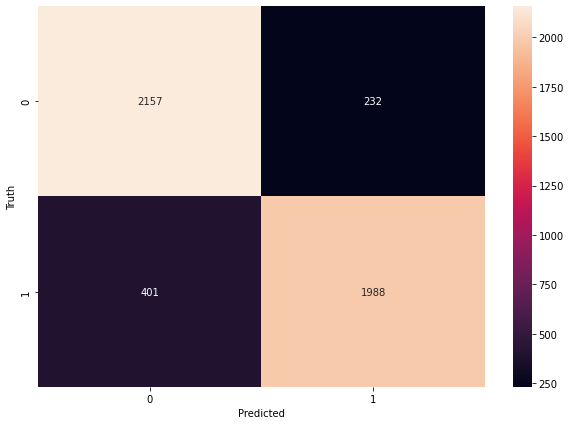

In [ ]:
ANN(x_sm, y_sm)

In [ ]:
2037*0.8

1629.6000000000001

In [ ]:
7963/5

1592.6

Ensenble learning

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape= (13,)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation= 'sigmoid'),])

In [ ]:
def ANN(x_train,y_train, x_test, y_test):
  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  
  model.fit(x_train, y_train, epochs=20)

  print(model.evaluate(x_test, y_test))

  y_preds = model.predict(x_test)
  y_preds = np.round(y_preds)

  print("Classification Report: \n", classification_report(y_test, y_preds))

  cm = tf.math.confusion_matrix(labels=y_test,predictions=y_preds)
  plt.figure(figsize = (10,7))
  sn.heatmap(cm, annot=True, fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('Truth')
  return y_preds

In [ ]:
df_0_0= df_0.iloc[:1592]
df_0_1= df_0.iloc[1592:3184]
df_0_2= df_0.iloc[3184:4777]
df_0_3= df_0.iloc[4777:6370]
df_0_4= df_0.iloc[6370:]
df_1_0= df_1.iloc[:1611]
df_1_1= df_1.iloc[1611:]

In [ ]:
def train_data(df_maj, df_min):
  df_train = pd.concat([df_maj, df_min], axis= 0 )
  x= df_train.drop(columns= ['Exited'])
  y = df_train.Exited
  x= scaler.fit_transform(x)
  return x,y

In [ ]:
x_test, y_test = train_data(df_0_2,df_1_1)
x_train, y_train = train_data(df_0_0, df_1_0)

Epoch 1/20
101/101 [==============================] - 1s 3ms/step - loss: 0.7290 - accuracy: 0.4596
Epoch 2/20
101/101 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.5295
Epoch 3/20
101/101 [==============================] - 0s 3ms/step - loss: 0.6634 - accuracy: 0.6347
Epoch 4/20
101/101 [==============================] - 0s 4ms/step - loss: 0.6427 - accuracy: 0.6584
Epoch 5/20
101/101 [==============================] - 1s 6ms/step - loss: 0.6282 - accuracy: 0.6638
Epoch 6/20
101/101 [==============================] - 0s 4ms/step - loss: 0.6190 - accuracy: 0.6675
Epoch 7/20
101/101 [==============================] - 0s 3ms/step - loss: 0.6113 - accuracy: 0.6753
Epoch 8/20
101/101 [==============================] - 1s 6ms/step - loss: 0.6060 - accuracy: 0.6791
Epoch 9/20
101/101 [==============================] - 0s 5ms/step - loss: 0.6003 - accuracy: 0.6909
Epoch 10/20
101/101 [==============================] - 0s 3ms/step - loss: 0.5958 - accuracy: 0.6906

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

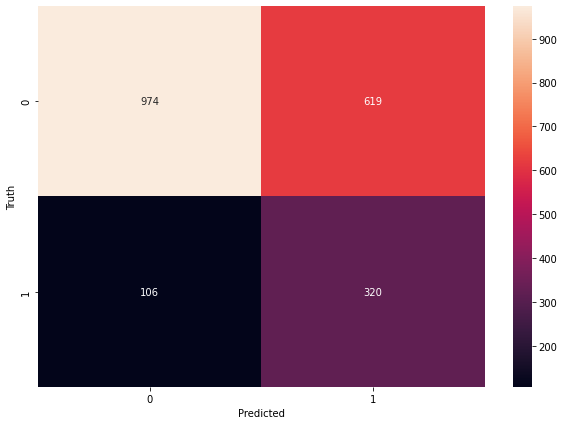

In [ ]:
ANN(x_train,y_train, x_test, y_test)

Epoch 1/20
101/101 [==============================] - 1s 3ms/step - loss: 0.5788 - accuracy: 0.6887
Epoch 2/20
101/101 [==============================] - 0s 3ms/step - loss: 0.5771 - accuracy: 0.6903
Epoch 3/20
101/101 [==============================] - 0s 3ms/step - loss: 0.5757 - accuracy: 0.6965
Epoch 4/20
101/101 [==============================] - 0s 3ms/step - loss: 0.5748 - accuracy: 0.7000
Epoch 5/20
101/101 [==============================] - 0s 3ms/step - loss: 0.5736 - accuracy: 0.7043
Epoch 6/20
101/101 [==============================] - 0s 3ms/step - loss: 0.5730 - accuracy: 0.7037
Epoch 7/20
101/101 [==============================] - 0s 3ms/step - loss: 0.5710 - accuracy: 0.7050
Epoch 8/20
101/101 [==============================] - 0s 3ms/step - loss: 0.5701 - accuracy: 0.7053
Epoch 9/20
101/101 [==============================] - 0s 3ms/step - loss: 0.5684 - accuracy: 0.7043
Epoch 10/20
101/101 [==============================] - 0s 3ms/step - loss: 0.5673 - accuracy: 0.7106

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

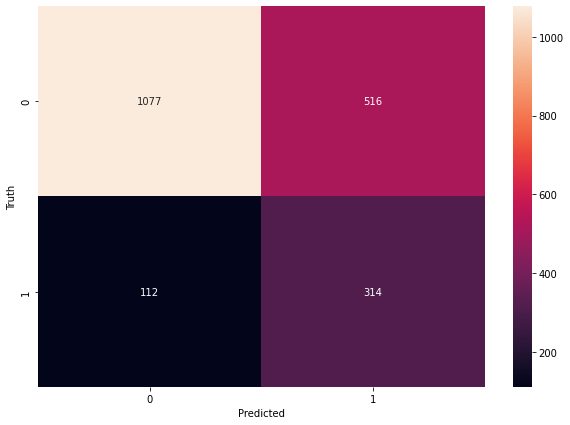

In [ ]:
x_train, y_train = train_data(df_0_1, df_1_0)
ANN(x_train,y_train, x_test, y_test)

Epoch 1/20
101/101 [==============================] - 1s 3ms/step - loss: 0.5473 - accuracy: 0.7313
Epoch 2/20
101/101 [==============================] - 0s 3ms/step - loss: 0.5447 - accuracy: 0.7319
Epoch 3/20
101/101 [==============================] - 0s 3ms/step - loss: 0.5422 - accuracy: 0.7319
Epoch 4/20
101/101 [==============================] - 0s 3ms/step - loss: 0.5406 - accuracy: 0.7325
Epoch 5/20
101/101 [==============================] - 0s 3ms/step - loss: 0.5386 - accuracy: 0.7328
Epoch 6/20
101/101 [==============================] - 0s 3ms/step - loss: 0.5370 - accuracy: 0.7369
Epoch 7/20
101/101 [==============================] - 0s 3ms/step - loss: 0.5349 - accuracy: 0.7381
Epoch 8/20
101/101 [==============================] - 0s 3ms/step - loss: 0.5334 - accuracy: 0.7391
Epoch 9/20
101/101 [==============================] - 0s 3ms/step - loss: 0.5306 - accuracy: 0.7447
Epoch 10/20
101/101 [==============================] - 0s 3ms/step - loss: 0.5292 - accuracy: 0.7459

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

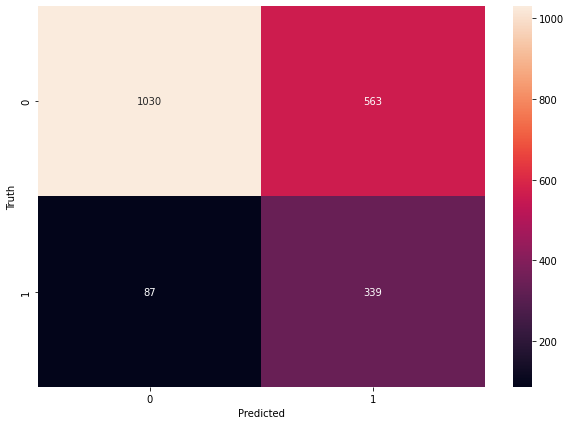

In [ ]:
x_train, y_train = train_data(df_0_3, df_1_0)
ANN(x_train,y_train, x_test, y_test)

Epoch 1/20
101/101 [==============================] - 1s 3ms/step - loss: 0.5202 - accuracy: 0.7509
Epoch 2/20
101/101 [==============================] - 0s 3ms/step - loss: 0.5173 - accuracy: 0.7572
Epoch 3/20
101/101 [==============================] - 0s 3ms/step - loss: 0.5162 - accuracy: 0.7522
Epoch 4/20
101/101 [==============================] - 0s 3ms/step - loss: 0.5154 - accuracy: 0.7525
Epoch 5/20
101/101 [==============================] - 0s 3ms/step - loss: 0.5138 - accuracy: 0.7541
Epoch 6/20
101/101 [==============================] - 0s 3ms/step - loss: 0.5133 - accuracy: 0.7547
Epoch 7/20
101/101 [==============================] - 0s 3ms/step - loss: 0.5109 - accuracy: 0.7575
Epoch 8/20
101/101 [==============================] - 0s 3ms/step - loss: 0.5100 - accuracy: 0.7575
Epoch 9/20
101/101 [==============================] - 0s 3ms/step - loss: 0.5097 - accuracy: 0.7541
Epoch 10/20
101/101 [==============================] - 0s 3ms/step - loss: 0.5077 - accuracy: 0.7562

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

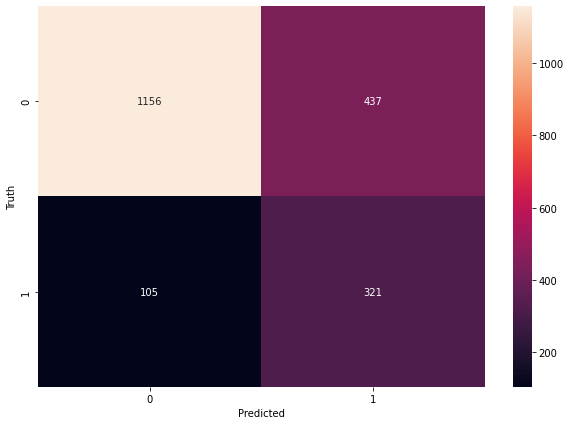

In [ ]:
x_train, y_train = train_data(df_0_4, df_1_0)
ANN(x_train,y_train, x_test, y_test)

we have now seen the above 4 metod for handling imbalance in data.

keras turner

continuing from previous dataset

In [ ]:
def ANN(hp):
  model = keras.Sequential([
      keras.layers.Input(shape= (13,)),

      keras.layers.Dense(units=hp.Int("units", min_value=2, max_value=200), activation=hp.Choice("activation", ["relu", "tanh"])),
      keras.layers.Dense(1, activation=hp.Choice("activation2", ["sigmoid", "softmax"])),])
  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model
  

In [ ]:
pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.4 MB/s eta 0:00:00


In [ ]:
import keras_tuner

tuner = keras_tuner.RandomSearch(
    hypermodel=ANN,
    objective="val_accuracy",
    max_trials=8,
    executions_per_trial=3,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)

In [ ]:
tuner.search_space_summary()


Search space summary
Default search space size: 3
units (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 200, 'step': 1, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
activation2 (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'softmax'], 'ordered': False}


In [ ]:
x= scaler.fit_transform(x)
x_train,x_test,y_train, y_test = train_test_split(x, y, test_size= 0.3, stratify=y, random_state=42)
tuner.search(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Trial 8 Complete [00h 01m 01s]
val_accuracy: 0.20366667211055756

Best val_accuracy So Far: 0.858222226301829
Total elapsed time: 00h 09m 15s


In [ ]:

tuner.results_summary()

Results summary
Results in my_dir/helloworld
Showing 10 best trials
Trial summary
Hyperparameters:
units: 40
activation: relu
activation2: sigmoid
Score: 0.858222226301829
Trial summary
Hyperparameters:
units: 91
activation: tanh
activation2: sigmoid
Score: 0.818666676680247
Trial summary
Hyperparameters:
units: 122
activation: tanh
activation2: sigmoid
Score: 0.8186666568120321
Trial summary
Hyperparameters:
units: 104
activation: tanh
activation2: sigmoid
Score: 0.8183333277702332
Trial summary
Hyperparameters:
units: 135
activation: tanh
activation2: sigmoid
Score: 0.8164444367090861
Trial summary
Hyperparameters:
units: 118
activation: tanh
activation2: softmax
Score: 0.20366667211055756
Trial summary
Hyperparameters:
units: 84
activation: tanh
activation2: softmax
Score: 0.20366667211055756
Trial summary
Hyperparameters:
units: 165
activation: tanh
activation2: softmax
Score: 0.20366667211055756


In [ ]:
best_model = tuner.get_best_models()[0]

best_model.fit(x_train, y_train, epochs=20)

print(best_model.evaluate(x_test, y_test))

Epoch 1/20
219/219 [==============================] - 1s 3ms/step - loss: 0.3587 - accuracy: 0.8507
Epoch 2/20
219/219 [==============================] - 1s 3ms/step - loss: 0.3576 - accuracy: 0.8513
Epoch 3/20
219/219 [==============================] - 1s 3ms/step - loss: 0.3565 - accuracy: 0.8519
Epoch 4/20
219/219 [==============================] - 1s 3ms/step - loss: 0.3541 - accuracy: 0.8527
Epoch 5/20
219/219 [==============================] - 1s 3ms/step - loss: 0.3531 - accuracy: 0.8517
Epoch 6/20
219/219 [==============================] - 1s 3ms/step - loss: 0.3527 - accuracy: 0.8517
Epoch 7/20
219/219 [==============================] - 1s 3ms/step - loss: 0.3520 - accuracy: 0.8513
Epoch 8/20
219/219 [==============================] - 1s 3ms/step - loss: 0.3515 - accuracy: 0.8540
Epoch 9/20
219/219 [==============================] - 1s 3ms/step - loss: 0.3499 - accuracy: 0.8544
Epoch 10/20
219/219 [==============================] - 1s 3ms/step - loss: 0.3487 - accuracy: 0.8554

In [ ]:

y_preds = best_model.predict(x_test)
y_preds = np.round(y_preds)

print("Classification Report: \n", classification_report(y_test, y_preds))

94/94 [==============================] - 0s 1ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      2389
           1       0.79      0.47      0.59       611

    accuracy                           0.87      3000
   macro avg       0.83      0.72      0.75      3000
weighted avg       0.86      0.87      0.85      3000



Text(69.0, 0.5, 'Truth')

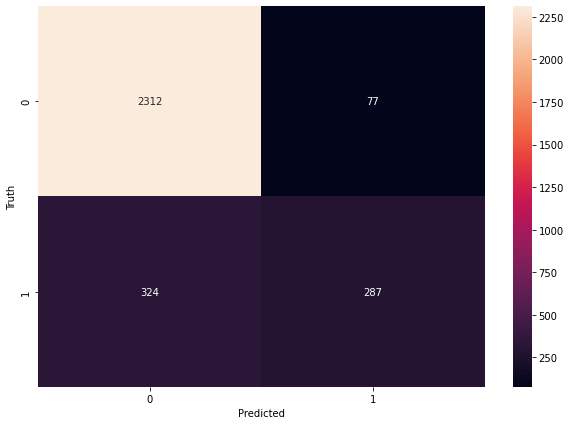

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_preds)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Image classification -1 small images cifar10 dataset

#### using ANN

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
(x_train, y_train,),(x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
import matplotlib.pyplot as plt
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(x_train[index])

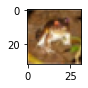

In [8]:
plot_sample(0)

In [9]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)


In [11]:
classes[y_train[0]]

'frog'

scaling

In [12]:
x_test = x_test/255
x_train = x_train/255

one hot encoding

In [13]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [14]:
y_train_categorical[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [16]:
from tensorflow.python.eager.monitoring import Metric
model.compile(
    optimizer='adam',
    loss= 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [17]:
model.fit(x_train, y_train_categorical, epochs= 5)

Epoch 1/5
1563/1563 [==============================] - 16s 8ms/step - loss: 1.8912 - accuracy: 0.3243
Epoch 2/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6657 - accuracy: 0.4017
Epoch 3/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5832 - accuracy: 0.4333
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5299 - accuracy: 0.4521
Epoch 5/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4944 - accuracy: 0.4691


In [18]:
model.evaluate(x_test, y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 1.5784 - accuracy: 0.4448


[1.578377604484558, 0.4447999894618988]

In [19]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [20]:
model2.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [21]:
model2.fit(x_train, y_train_categorical, epochs= 5)

Epoch 1/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8133 - accuracy: 0.3552
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6240 - accuracy: 0.4248
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5426 - accuracy: 0.4567
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4848 - accuracy: 0.4754
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4332 - accuracy: 0.4948


In [22]:
model2.evaluate(x_test, y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 1.5298 - accuracy: 0.4570


[1.5298285484313965, 0.4569999873638153]

#### using CNN

In [23]:
model_CNN = keras.Sequential([
    keras.layers.Input(shape=(32, 32, 3)),
    keras.layers.Conv2D(filters= 32, kernel_size= (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2),),

    keras.layers.Conv2D(filters= 64, kernel_size= (3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2),),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [24]:
model_CNN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model_CNN.fit(x_train, y_train_categorical, epochs= 10)

Epoch 1/10
1563/1563 [==============================] - 13s 4ms/step - loss: 1.4504 - accuracy: 0.4809
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1184 - accuracy: 0.6102
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9844 - accuracy: 0.6558
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8952 - accuracy: 0.6884
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8236 - accuracy: 0.7151
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7633 - accuracy: 0.7349
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7105 - accuracy: 0.7541
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6648 - accuracy: 0.7699
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6205 - accuracy: 0.7843
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.58

In [27]:
model_CNN.evaluate(x_test,y_test_categorical)

313/313 [==============================] - 2s 4ms/step - loss: 0.9294 - accuracy: 0.6951


[0.9293844699859619, 0.6951000094413757]

In [29]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model_CNN.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.75      0.74      1000
           1       0.81      0.80      0.81      1000
           2       0.64      0.52      0.57      1000
           3       0.53      0.45      0.49      1000
           4       0.58      0.73      0.64      1000
           5       0.67      0.55      0.60      1000
           6       0.67      0.85      0.75      1000
           7       0.77      0.73      0.75      1000
           8       0.76      0.86      0.80      1000
           9       0.81      0.72      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



### image classification MNIST dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
y_train[0]

5

In [5]:
model = keras.Sequential([
    keras.layers.Input(shape=(28,28,1)),

    #first convolution layer
    keras.layers.Conv2D(filters=16, kernel_size=(2,2),activation='relu'),
    keras.layers.MaxPool2D((2,2),),

    #second convolution layer
    keras.layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D((2,2),),

    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid'),

])

In [6]:
model.compile(
    optimizer= 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy',]
)

In [7]:
x_train  = x_train/255
x_test  = x_test/255

In [8]:
model.fit(x_train, y_train, epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 10s 3ms/step - loss: 0.1670 - accuracy: 0.9489
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0586 - accuracy: 0.9816
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0410 - accuracy: 0.9872
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0315 - accuracy: 0.9902
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0253 - accuracy: 0.9913
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0188 - accuracy: 0.9941
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0160 - accuracy: 0.9947
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0135 - accuracy: 0.9954
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0117 - accuracy: 0.9962
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.01

In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0497 - accuracy: 0.9879


[0.04968007281422615, 0.9879000186920166]

In [10]:
y_pred = model.predict(x_test)

y_predicted_labels = [np.argmax(i) for i in y_pred]

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

cm

313/313 [==============================] - 1s 2ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    3,    1,    0,    0,    1,    1,    2,    0],
       [   1, 1122,    1,    1,    0,    2,    2,    3,    1,    2],
       [   0,    1, 1022,    5,    0,    0,    1,    3,    0,    0],
       [   0,    1,    0, 1008,    0,    1,    0,    0,    0,    0],
       [   0,    0,    0,    0,  975,    0,    2,    0,    1,    4],
       [   1,    0,    0,   10,    0,  878,    1,    0,    2,    0],
       [   3,    1,    2,    0,    1,    8,  938,    0,    5,    0],
       [   0,    1,    3,    6,    1,    0,    0, 1009,    1,    7],
       [   1,    0,    2,    8,    0,    0,    0,    0,  960,    3],
       [   0,    0,    0,    2,    2,    6,    0,    3,    1,  995]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

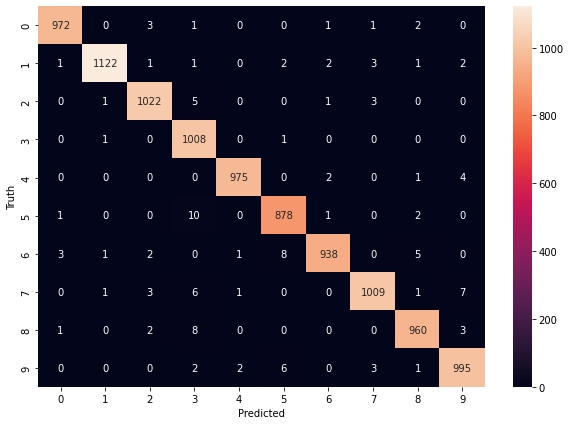

In [11]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')